In [1]:
import pandas as pd
import os, csv

In [ ]:
evaluation = pd.read_csv("complete_response_with_spearman.csv")
evaluation

In [ ]:
df_gpt_text_davinci_003 = evaluation[evaluation['Model']=='text-davinci-003']
df_gpt_text_davinci_003

In [ ]:
df_gpt_4 = evaluation[evaluation['Model']=='gpt-4']
df_gpt_4

In [ ]:
df_gpt_turbo = evaluation[evaluation['Model']=='gpt-3.5-turbo']
df_gpt_turbo

In [ ]:
'''
3 Dataframe

df_gpt_text_davinci_003
df_gpt_4
df_gpt_turbo
'''

df_gpt_text_davinci_003.nlargest(1,'spearman_rank_correlation')

In [ ]:
df_gpt_4.nlargest(1,'spearman_rank_correlation')

In [ ]:
df_gpt_turbo.nlargest(1,'spearman_rank_correlation')

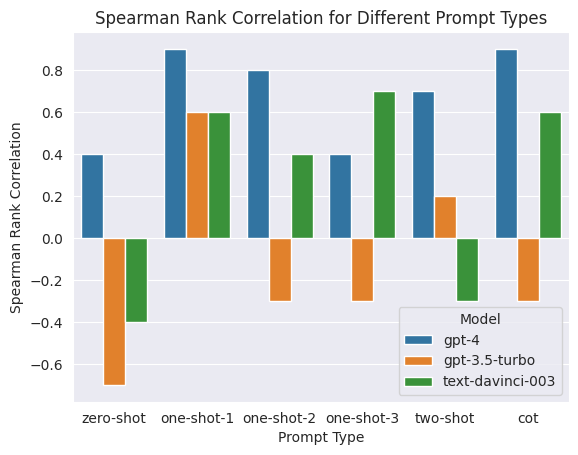

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the three dataframes into one
combined_df = pd.concat([df_gpt_4, df_gpt_turbo, df_gpt_text_davinci_003])

# Create a barplot using seaborn
sns.set_style("darkgrid")
ax = sns.barplot(x="Prompt Type", y="spearman_rank_correlation", hue="Model", data=combined_df)
ax.set(title='Spearman Rank Correlation for Different Prompt Types', xlabel='Prompt Type', ylabel='Spearman Rank Correlation')
plt.savefig("plot.pdf", bbox_inches="tight")
plt.show()

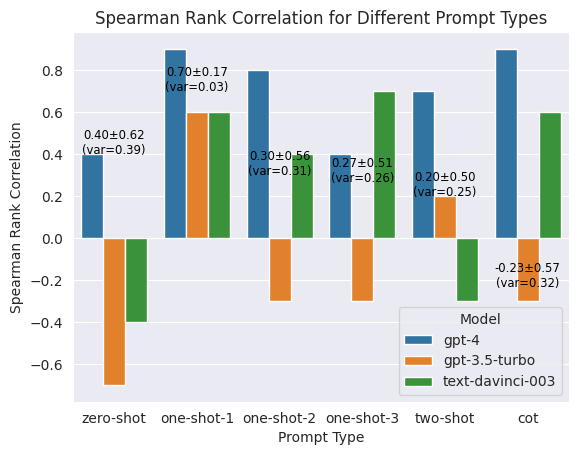

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the three dataframes into one
combined_df = pd.concat([df_gpt_4, df_gpt_turbo, df_gpt_text_davinci_003])

# Calculate the average spearman rank correlation for each prompt
average_rank_correlation = combined_df.groupby('Prompt Type')['spearman_rank_correlation'].mean()
std_rank_correlation = combined_df.groupby('Prompt Type')['spearman_rank_correlation'].std()
var_rank_correlation = combined_df.groupby('Prompt Type')['spearman_rank_correlation'].var()

# Create a barplot using seaborn
sns.set_style("darkgrid")
ax = sns.barplot(x="Prompt Type", y="spearman_rank_correlation", hue="Model", data=combined_df)
ax.set(title='Spearman Rank Correlation for Different Prompt Types', xlabel='Prompt Type', ylabel='Spearman Rank Correlation')

# Show the average spearman rank correlation for each prompt
for i, v in enumerate(average_rank_correlation):
    plt.text(i, v, f"{v:.2f}±{std_rank_correlation[i]:.2f}\n(var={var_rank_correlation[i]:.2f})", color='black', ha="center", size='small')

plt.savefig("plot_std.pdf", bbox_inches="tight")
plt.show()


Observation

1. GPT-4 Is the best
2. Good Example provided in one shot matters a lot
3. Zero-shot is not good at all
4. One Shot seems to performs better on average

# Extra Code

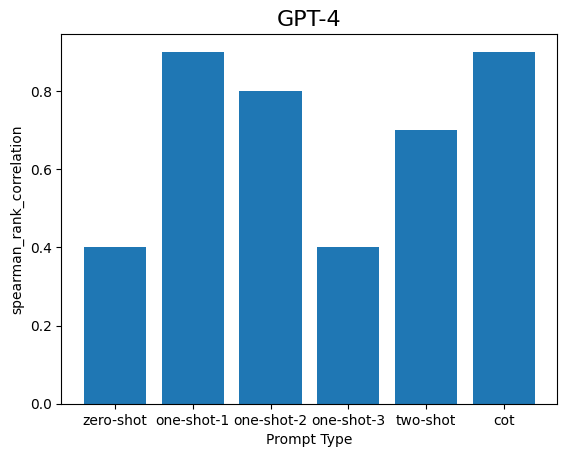

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.bar(df_gpt_4['Prompt Type'], df_gpt_4['spearman_rank_correlation'])
plt.title('GPT-4', fontsize=16)
plt.xlabel('Prompt Type')
plt.ylabel('spearman_rank_correlation')
plt.show()